## Linear Regression - Intuitively Selected Features - Baseline

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
# read in cleaned dataset

housing = pd.read_csv('./datasets/modified_train.csv')

In [14]:
# create X and y
# features - 12 top features based on the correlation heatmap

features = ['Overall Qual', 'Total SF', 'Garage Area', 'Garage Cars_3.0', '1st Flr SF', 'Year Built', 
                 'Year Remod/Add', 'Foundation_PConc', 'Mas Vnr Area', 'Full Bath_1', 'Kitchen Qual_TA', 'Exter Qual_TA']

X = housing[features]

y = housing['SalePrice']

In [15]:
# instantiate linear regression model

lr_model = LinearRegression()

In [16]:
# fit X and y to model

lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# beta hat coefficients (slope)

lr_model.coef_

array([ 1.82644235e+04,  3.00090345e+01,  1.87819077e+01,  4.12048444e+04,
        1.83730666e+01,  8.63302922e+01,  2.80923408e+02,  5.83944143e+03,
        2.54314061e+01, -1.90707263e+02, -5.84363817e+03, -6.79291857e+03])

In [18]:
# y intercept

lr_model.intercept_

-751006.0312410725

In [19]:
# generate predictions

y_preds = lr_model.predict(X)

In [20]:
# r2 score

r2_score(y, y_preds)

# The model, as it is, explains 82% of the variance in Sales Price

0.8209722941812156

In [21]:
# compute residual error

residuals = y - y_preds

In [22]:
# average of residuals

np.mean(residuals)

-1.0233877389271744e-10

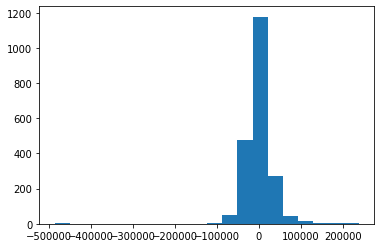

In [23]:
# distribution of residuals

plt.hist(residuals, bins=20);

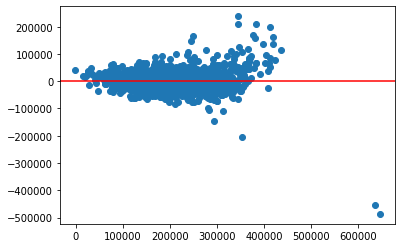

In [24]:
# residual scatter plot

plt.scatter(y_preds, residuals)
plt.axhline(0, color='red');

# few overpredictions, some underpredictions

In [25]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# check train and test data size

print('X_train sample size:', X_train.shape[0])
print('X_test sample size:', X_test.shape[0])
print('y_train sample size:', y_train.shape[0])
print('y_test sample size:', y_test.shape[0])

X_train sample size: 1538
X_test sample size: 513
y_train sample size: 1538
y_test sample size: 513


In [30]:
# instantiate Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

# print model coefficients
print('Training Data')
print('')
print('Coefficients:', lr.coef_)
print('')
print('Intercept:', lr.intercept_)

Training Data

Coefficients: [ 1.88493737e+04  2.80757628e+01  1.36290041e+01  4.24849865e+04
  1.58954921e+01  9.15079746e+01  2.97983142e+02  5.74568292e+03
  2.56874082e+01 -6.99639939e+02 -5.31297303e+03 -6.55217228e+03]

Intercept: -790328.3599495242


## Evaluating the Model

In [31]:
# r2 score - train data

print('Training Data:')
print('R-squared score:', lr.score(X_train, y_train))
print(f'The model explains {lr.score(X_train, y_train) * 100 : .4}% of the variance in sales price.')

Training Data:
R-squared score: 0.8050017517512555
The model explains  80.5% of the variance in sales price.


In [32]:
# r2 score - test data

print('Test Data:')
print('R-squared score:', lr.score(X_test, y_test))
print(f'The model explains {lr.score(X_test, y_test) * 100 : .4}% of the variance in sales price.')

Test Data:
R-squared score: 0.866532588945603
The model explains  86.65% of the variance in sales price.


In [33]:
# 5-fold cross validation

print('Cross-validation Score =', 
      cross_val_score(lr, X_train, y_train, cv=5).mean().round(2))

Cross-validation Score = 0.78
